<a href="https://colab.research.google.com/github/wanessaneves/Projetos-DataAnalytics/blob/main/Case_Cosmetico_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
dados = pd.read_csv('/content/desafio01consumidor-230829-103627.csv')

In [ ]:
dados.head()

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1


In [ ]:
dados['produto'].unique()

array(['batom', 'desodorante', 'sombra', 'perfume', 'antissinais', 'base'],
      dtype=object)

In [ ]:
dados['regiao-BR'].unique()

array(['Sudeste', 'Nordeste', 'Centro-Oeste', 'Sul', 'Norte'],
      dtype=object)

In [ ]:
dados['pre-pandemia'].unique()

array([1, 0])

In [ ]:
dados_idade= dados[dados['pre-pandemia'] == 1]

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_cliente    203 non-null    object
 1   idade         203 non-null    int64 
 2   renda         203 non-null    int64 
 3   produto       203 non-null    object
 4   regiao-BR     203 non-null    object
 5   pre-pandemia  203 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.6+ KB


In [ ]:
dados.shape[0]

203

In [ ]:
dados['pre-pandemia'].value_counts()

0    102
1    101
Name: pre-pandemia, dtype: int64

In [ ]:
print('A idade mínima é %s e a máxima é %s' % (dados['idade'].min(), dados['idade'].max()) )

A idade mínima é 15 e a máxima é 80


In [ ]:
print('A renda mínima é %s e a máxima é %s' % (dados['renda'].min(), dados['renda'].max()) )

A renda mínima é 110 e a máxima é 30000


In [ ]:
dados.value_counts()

id_cliente  idade  renda  produto      regiao-BR     pre-pandemia
XXXXXXX10   42     6891   batom        Sul           1               1
XXXXXXX70   28     3231   sombra       Centro-Oeste  1               1
XXXXXXX66   43     13787  desodorante  Nordeste      1               1
XXXXXXX67   35     25959  batom        Sul           0               1
            44     16693  antissinais  Centro-Oeste  0               1
                                                                    ..
XXXXXXX39   31     10590  desodorante  Nordeste      1               1
XXXXXXX40   22     11866  desodorante  Sul           0               1
            35     4867   desodorante  Nordeste      1               1
            38     18166  sombra       Nordeste      0               1
XXXXXXX99   55     18864  batom        Sul           1               1
Length: 203, dtype: int64

In [ ]:
dados.describe()

,idade,renda,pre-pandemia
count,203.000000,203.000000,203.000000
mean,42.403941,11586.364532,0.497537
std,14.400715,6288.016708,0.501230
min,15.000000,110.000000,0.000000
25%,31.000000,6705.000000,0.000000
50%,41.000000,11145.000000,0.000000
75%,53.000000,15590.500000,1.000000
max,80.000000,30000.000000,1.000000


# 1. Entenda a distribuição de variáveis como de idade / renda / regiao / produtos mais comprados antes e depois da pandemia

a. Identifique as distribuições

b. Plote histogramas / boxplots

O produto mais comprado antes da pandemia foi o batom, e depois da pandemia passou a ser o desodorante

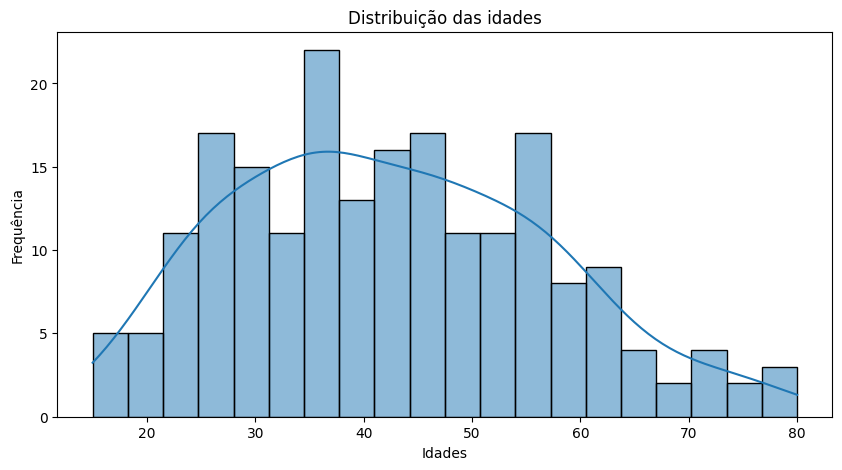

In [ ]:
#plotando gráfico de distribuição da variável idade

plt.figure(figsize=(10, 5)),
sns.histplot(data=dados, x='idade', bins=20, kde=True),
plt.title("Distribuição das idades"),
plt.xlabel("Idades"),
plt.ylabel("Frequência"),
plt.show()

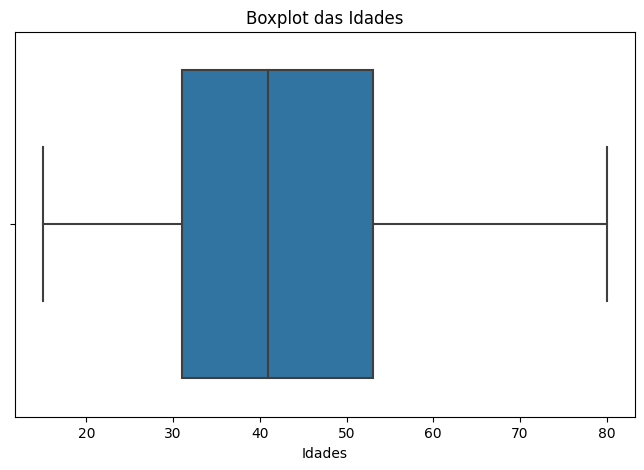

In [ ]:
#Plotando BoxPlot

plt.figure(figsize=(8, 5))
sns.boxplot(data=dados, x='idade')
plt.title("Boxplot das Idades")
plt.xlabel("Idades")
plt.show()

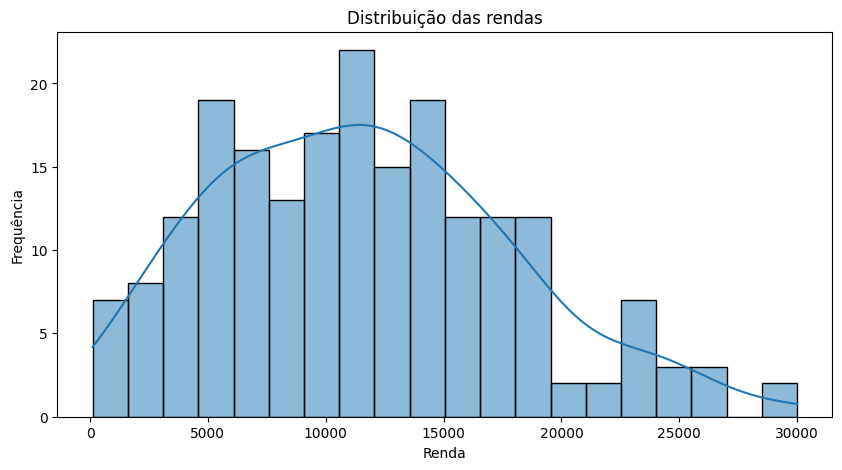

In [ ]:
#plotando gráfico de distribuição da variável renda

plt.figure(figsize=(10, 5)),
sns.histplot(data=dados, x='renda', bins=20, kde=True),
plt.title("Distribuição das rendas"),
plt.xlabel("Renda"),
plt.ylabel("Frequência"),
plt.show()

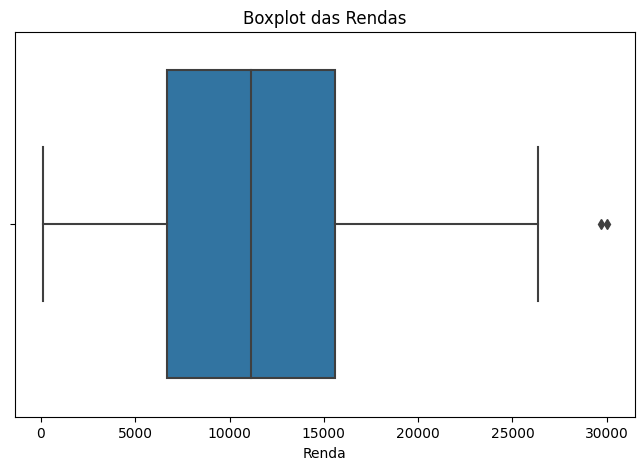

In [ ]:
#Plotando BoxPlot

plt.figure(figsize=(8, 5))
sns.boxplot(data=dados, x='renda')
plt.title("Boxplot das Rendas")
plt.xlabel("Renda")
plt.show()

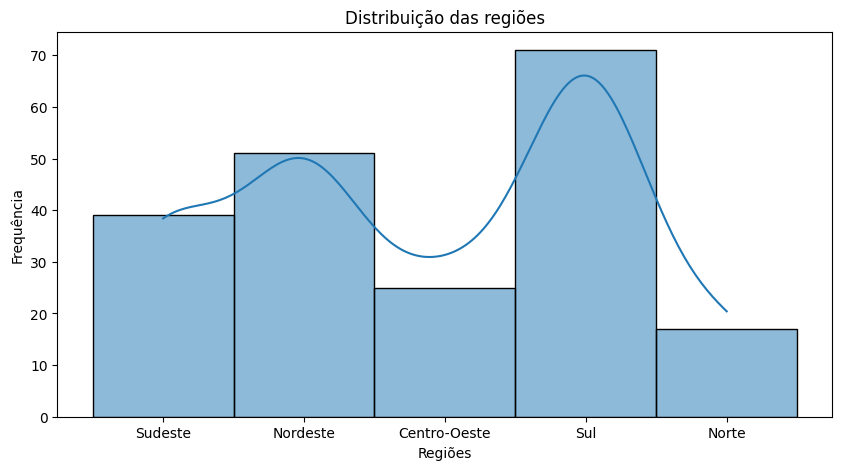

In [ ]:
#plotando gráfico de distribuição da variável região-BR

plt.figure(figsize=(10, 5)),
sns.histplot(data=dados, x='regiao-BR', bins=20, kde=True),
plt.title("Distribuição das regiões"),
plt.xlabel("Regiões"),
plt.ylabel("Frequência"),
plt.show()

In [ ]:
dados_agrupados= dados.groupby('regiao-BR')['renda'].mean().sort_values(ascending=False)
dados_agrupados

regiao-BR
Sul             12496.436620
Nordeste        11354.823529
Sudeste         11213.641026
Centro-Oeste    11179.960000
Norte            9932.823529
Name: renda, dtype: float64

<ipython-input-21-97c2bc3f9428>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dados, x='renda', y='regiao-BR', ci=None, order=dados_agrupados.index, palette='viridis')


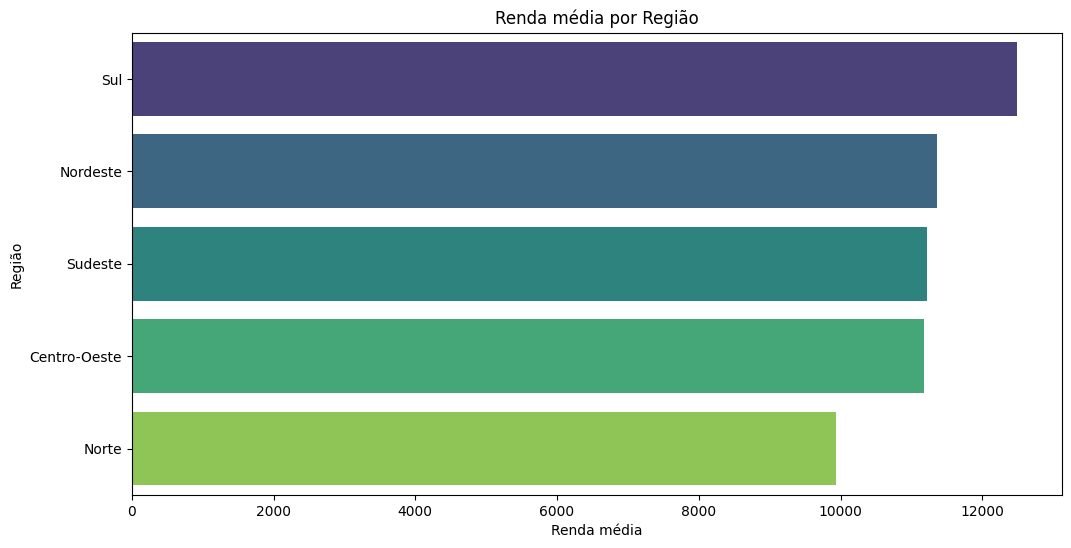

In [ ]:
#visualizando a renda média da população por região
plt.figure(figsize=(12, 6))
sns.barplot(data=dados, x='renda', y='regiao-BR', ci=None, order=dados_agrupados.index, palette='viridis')
plt.title("Renda média por Região")
plt.xlabel("Renda média")
plt.ylabel("Região")
plt.show()

# 2. Você notou diferenças nítidas pré e pós pandemia? Como você poderia provar estatisticamente que essas diferenças são significativas ?

#filtrando os dados por pré-pandemia:

In [ ]:
# filtrando os dados onde pre-pandemia é igual a 1
dados_pre_pandemia = dados[dados['pre-pandemia'] == 1]

# Agrupando os dados que foram filtrados por 'produto' e 'regiao-BR' e calculando o tamanho de cada grupo, além de atribuir o nome quantidade a nova coluna gerada
produto_por_regiao = dados_pre_pandemia.groupby(['produto', 'regiao-BR']).size().reset_index(name='quantidade')
produto_por_regiao

,produto,regiao-BR,quantidade
0,antissinais,Centro-Oeste,1
1,antissinais,Norte,8
2,base,Centro-Oeste,3
3,batom,Nordeste,11
4,batom,Sudeste,21
5,batom,Sul,29
6,desodorante,Centro-Oeste,5
7,desodorante,Nordeste,15
8,perfume,Centro-Oeste,4
9,sombra,Centro-Oeste,4


In [ ]:
produto_por_regiao['quantidade'].sum()

101

In [ ]:
media_pre_pandemia = produto_por_regiao['quantidade'].median()
media_pre_pandemia

6.5

In [ ]:
desvio_pre_pandemia = produto_por_regiao['quantidade'].std()
desvio_pre_pandemia

9.060905032059436

In [ ]:
produto_por_regiao.groupby(['produto', 'quantidade']).sum()

regiao-BR
produto     quantidade              
antissinais 1           Centro-Oeste
            8                  Norte
base        3           Centro-Oeste
batom       11              Nordeste
            21               Sudeste
            29                   Sul
desodorante 5           Centro-Oeste
            15              Nordeste
perfume     4           Centro-Oeste
sombra      4           Centro-Oeste

**Verificando a renda no período pre-pandemia**


In [ ]:
dados_pre_pandemia['renda'].mean()

9180.643564356436

**Verificando o perfil dos clientes por idade no período pré-pandemia**

In [ ]:
dados_pre_pandemia['idade'].describe()

count    101.000000
mean      39.881188
std       15.016183
min       16.000000
25%       28.000000
50%       37.000000
75%       48.000000
max       80.000000
Name: idade, dtype: float64

#filtrando os dados por pós-pandemia

In [ ]:
#verificando se houve alteração quanto a quantidade aplicando o filtro de clientes pós-pandemia
dados_pos_pandemia1 = dados[dados['pre-pandemia'] == 0]

produto_por_regiao1 = dados_pos_pandemia1.groupby(['produto', 'regiao-BR']).size().reset_index(name='quantidade')
produto_por_regiao1

,produto,regiao-BR,quantidade
0,antissinais,Centro-Oeste,8
1,antissinais,Nordeste,3
2,antissinais,Norte,9
3,base,Nordeste,4
4,batom,Sudeste,14
5,batom,Sul,1
6,desodorante,Nordeste,1
7,desodorante,Sudeste,4
8,desodorante,Sul,41
9,perfume,Nordeste,8


In [ ]:
produto_por_regiao1['quantidade'].sum()

102

In [ ]:
produto_por_regiao1['quantidade'].median()

8.0

In [ ]:
produto_por_regiao1['produto'].unique()

array(['antissinais', 'base', 'batom', 'desodorante', 'perfume', 'sombra'],
      dtype=object)

In [ ]:
produto_por_regiao1.groupby(['produto', 'quantidade']).sum()

regiao-BR
produto     quantidade              
antissinais 3               Nordeste
            8           Centro-Oeste
            9                  Norte
base        4               Nordeste
batom       1                    Sul
            14               Sudeste
desodorante 1               Nordeste
            4                Sudeste
            41                   Sul
perfume     8               Nordeste
sombra      9               Nordeste

**Verificando a renda no período pós-pandemia**

In [ ]:
dados_pos_pandemia1['renda'].mean()

13968.5

**Verificando o perfil dos clientes por idade no período pós-pandemia**

In [ ]:
dados_pos_pandemia1['idade'].describe()

count    102.000000
mean      44.901961
std       13.373174
min       15.000000
25%       35.250000
50%       46.000000
75%       54.750000
max       77.000000
Name: idade, dtype: float64

#Verificando a quantidade sem aplicar filtro:

In [ ]:
#verificando se houve alteração quanto a quantidade sem aplicar o filtro
produto_por_regiao2 = dados.groupby(['produto', 'regiao-BR']).size().reset_index(name='quantidade')
produto_por_regiao2

,produto,regiao-BR,quantidade
0,antissinais,Centro-Oeste,9
1,antissinais,Nordeste,3
2,antissinais,Norte,17
3,base,Centro-Oeste,3
4,base,Nordeste,4
5,batom,Nordeste,11
6,batom,Sudeste,35
7,batom,Sul,30
8,desodorante,Centro-Oeste,5
9,desodorante,Nordeste,16


In [ ]:
produto_por_regiao2['quantidade'].sum()

203

In [ ]:
media_periodototal = produto_por_regiao2['quantidade'].median()
media_periodototal

8.5

In [ ]:
desvio_padrao_total = produto_por_regiao2['quantidade'].std()
desvio_padrao_total

12.19135622753542

<Figure size 1000x600 with 0 Axes>

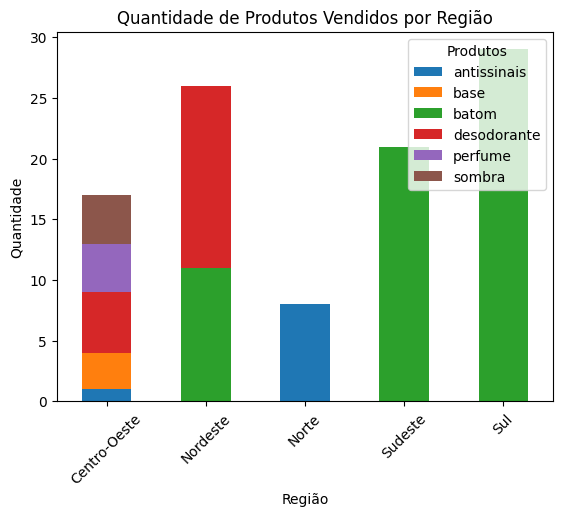

In [ ]:
pivot_table = pd.pivot_table(produto_por_regiao, values='quantidade', index='regiao-BR', columns='produto', aggfunc='sum', fill_value=0)

# 2. Criaando um gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', stacked=True)
plt.title("Quantidade de Produtos Vendidos por Região")
plt.xlabel("Região")
plt.ylabel("Quantidade")
plt.legend(title="Produtos", loc='upper right')
plt.xticks(rotation=45)
plt.show()







<Figure size 1000x600 with 0 Axes>

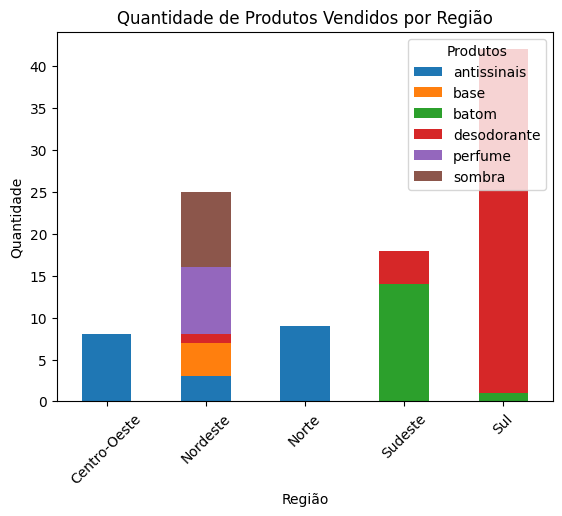

In [ ]:
pivot_table = pd.pivot_table(produto_por_regiao1, values='quantidade', index='regiao-BR', columns='produto', aggfunc='sum', fill_value=0)

# 2. Criando um gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', stacked=True)
plt.title("Quantidade de Produtos Vendidos por Região")
plt.xlabel("Região")
plt.ylabel("Quantidade")
plt.legend(title="Produtos", loc='upper right')
plt.xticks(rotation=45)
plt.show()


#Suponha agora que os dados recebidos são somente uma amostra da sua população total de clientes. Suponha que a sua "população" de clientes verdadeira é de 100000. Qual o tamanho da amostra necessária para chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A base informada é suficiente? E com uma margem de erro de 10%?

In [ ]:
#encontrando a média
media = produto_por_regiao2['quantidade'].mean()
media



12.6875

In [ ]:
sigma= produto_por_regiao2['quantidade'].std()
sigma

12.19135622753542

In [ ]:
#calculando o nível de significancia
confianca = 0.95
significancia = 1 - confianca



In [ ]:
# normalizando a variável e calculando o erro para o valor de 0.02%

z = norm.ppf(0.5 + (confianca / 2))
erro_percentual = 0.02
e = media * erro_percentual
e



0.25375000000000003

In [ ]:
# calculando o erro para o valor de 0.10%
erro_percentual = 0.10
e_ = media * erro_percentual
e_

1.26875

In [ ]:
#tamanho populacional
N = 100000
N

100000

In [ ]:
#encontrando o tamanho da amostra com uma margem de erro de 0.02%

tamanho_da_amostra = ((z**2) * (sigma**2) * (N)) / (((z**2) * (sigma**2)) + ((e**2) * (N - 1)))
int(tamanho_da_amostra.round())




8145

In [ ]:
#encontrando o tamanho da amostra com uma margem de erro de 0.10%

tamanho_da_amostra_ = ((z**2) * (sigma**2) * (N)) / (((z**2) * (sigma**2)) + ((e_**2) * (N - 1)))
int(tamanho_da_amostra_.round())

353

### A base de dados não é suficiente, pois ela representa somente *2,29%* aproximadamente do tamanho da amostra necessária com uma margem de erro de *2%* assumindo que o tamanho populacional equivale a *100.000*, e mesmo se aproximando ao tamanho da amostra com uma margem de erro de *10%* ainda não seria suficiente.

___